<a href="https://colab.research.google.com/github/luisfranc123/Tutorials_Statistics_Numerical_Analysis/blob/main/Applied_Statistics/multiple_linear_regression_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression:**

Linear regression is a statistical method used to analyze the relationship between a dependent variable and one or more independent variables. In linear regression, the relationship between the variables is modeled using a linear equation. This equation can be used to predict the value of the dependent variable based on the values of the independent variables.

There are several types of linear regression, including simple linear regression, multiple linear regression, and polynomial regression.

* **Simple linear regression:** This type of linear regression models the relationship between a dependent variable and a single independent variable. It is used to identify the strength of the relationship between the two variables and to predict the value of the dependent variable based on the value of the independent variable.

* **Multiple linear regression:** This type of linear regression models the relationship between a dependent variable and two or more independent variables. It is used to identify the strength of the relationship between the variables and to predict the value of the dependent variable based on the values of the independent variables.

* **Polynomial regression:** This type of linear regression is used to model relationships between the dependent and independent variables that are not linear. It can be used to fit a curve to the data and make predictions based on the curve.

You can find my project about simple linear regression [here](http://www.kaggle.com/code/emineyetm/simple-linear-regression-using-python).

*Multiple regression* is a statistical method used to model the relationship between multiple independent variables and a dependent variable. In Python, this can be performed using the sklearn library. To use multiple regression with this library, you will first need to create a LinearRegression object, then train the model on your data using the fit() method. Once the model is trained, you can use the predict() method to make predictions on new data.

* Here : Y = b0 + b1 * x1 + b2 * x2 + b3 * x3 + …… bn * xn
* Y = Dependent variable and x1, x2, x3, …… xn = multiple independent variables

**Assumption of Regression Model :**
* Linearity: The relationship between dependent and independent variables should be linear.
* Homoscedasticity: Constant variance of the errors should be maintained.
* Multivariate normality: Multiple Regression assumes that the residuals are normally distributed.
* Lack of Multicollinearity: It is assumed that there is little or no multicollinearity in the data.

In [ ]:
# Main Libraries for Numerical Analaysis and data processing
#Importing the libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
import warnings
warnings.filterwarnings("ignore")

# We will use some methods from the sklearn module
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

###**Loading Dataset**

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle(1).json ~/.kaggle/

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `cp kaggle(1).json ~/.kaggle/'


In [ ]:
!kaggle datasets download -d emineyetm/cardataset

Dataset URL: https://www.kaggle.com/datasets/emineyetm/cardataset
License(s): unknown
  0% 0.00/628 [00:00<?, ?B/s]
100% 628/628 [00:00<00:00, 254kB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cardataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# Reading the Dataset
path_loc = '/content/data.csv'
df = pd.read_csv(path_loc)

In [ ]:
df.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Car     36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Weight  36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


In [ ]:
df.shape

(36, 5)

In [ ]:
df.columns

Index(['Car', 'Model', 'Volume', 'Weight', 'CO2'], dtype='object')

In [ ]:
num_columns = ['Volume', 'Weight', 'CO2']
print(df[num_columns].corr().round(3))

        Volume  Weight    CO2
Volume   1.000   0.754  0.592
Weight   0.754   1.000  0.552
CO2      0.592   0.552  1.000


In [ ]:
print(df.describe().round(3))

         Volume    Weight      CO2
count    36.000    36.000   36.000
mean   1611.111  1292.278  102.028
std     388.975   242.124    7.455
min     900.000   790.000   90.000
25%    1475.000  1117.250   97.750
50%    1600.000  1329.000   99.000
75%    2000.000  1418.250  105.000
max    2500.000  1746.000  120.000


**Then make a list of the independent values and call this variable X. Put the dependent values in a variable called y.**

It is common to name the list of independent values with an uppercase X and the list of dependent values with a lowercase y.
* **Equation:** Sales = β0 + (β1 * Weight) + (β2 * Volume) + e
* Setting the values for independent **(X)** variable and dependent **(Y)** variable

In [ ]:
#Setting the value for X and Y
X = df[['Weight', 'Volume']]
y = df['CO2']

**Checking for outliers**

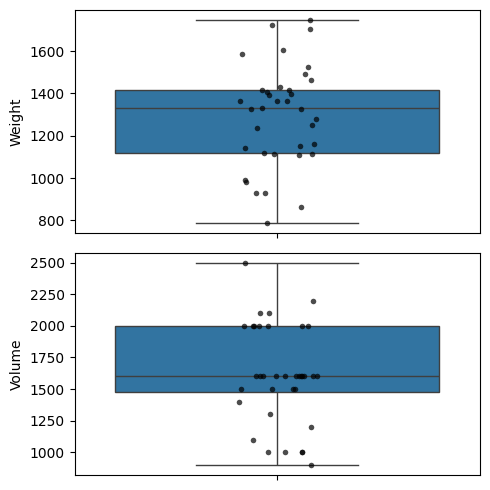

In [ ]:
fig, axs = plt.subplots(2, figsize = (5,5))
plt1 = sns.boxplot(df['Weight'], ax = axs[0])
sns.stripplot(df['Weight'], ax=axs[0], color='black',
              size=4, jitter=True, alpha=0.7)
plt2 = sns.boxplot(df['Volume'], ax = axs[1])
sns.stripplot(df['Volume'], ax=axs[1], color='black',
              size=4, jitter=True, alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
print("Weight description")
print(df['Weight'].describe().round(3))
print("------")
print("Volume description")
print(df['Volume'].describe().round(3))

Weight description
count      36.000
mean     1292.278
std       242.124
min       790.000
25%      1117.250
50%      1329.000
75%      1418.250
max      1746.000
Name: Weight, dtype: float64
------
Volume description
count      36.000
mean     1611.111
std       388.975
min       900.000
25%      1475.000
50%      1600.000
75%      2000.000
max      2500.000
Name: Volume, dtype: float64


# Exploratory Data Analysis

**Distribution of the target variable**

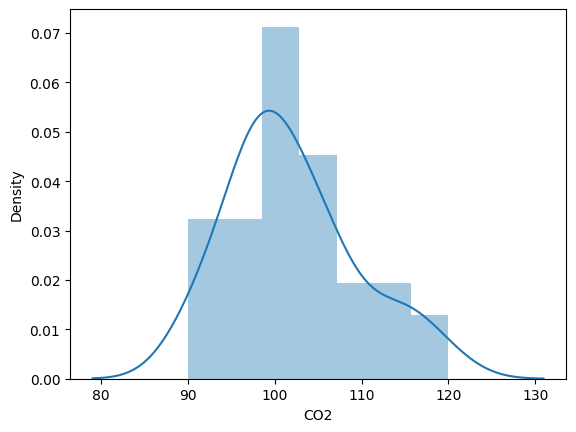

In [ ]:
sns.distplot(df['CO2']);

**Conclusion:** It is normally distributed

**Relationship of CO2 with other variables**

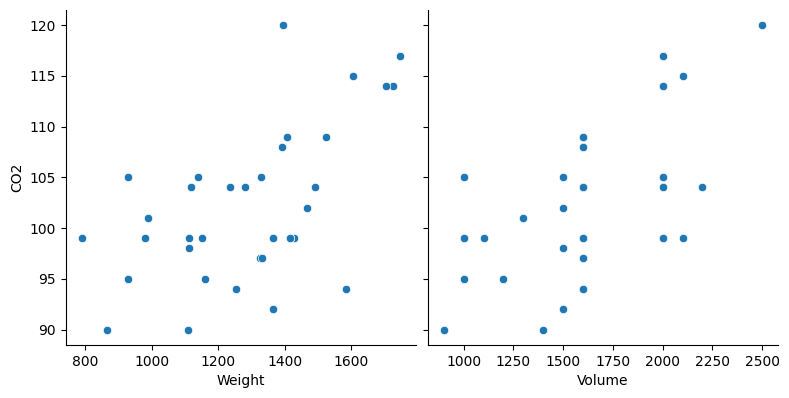

In [ ]:
sns.pairplot(df, x_vars=['Weight', 'Volume'], y_vars='CO2',
             height=4, aspect=1, kind='scatter')
plt.show()

**Heatmap**
The sns.heatmap() function creates a visualization that shows the correlation matrix of a dataset as a heatmap. The annot parameter of this function shows or does not show correlation values in the cells of the heatmap. If this parameter is set to True, correlation values in cells are displayed.

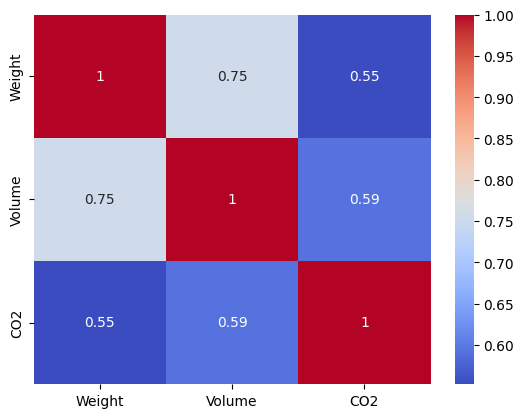

In [ ]:
# Create the correlation matrix and represent it as a heatmap.
data_hp = df[['Weight', 'Volume', 'CO2']]
sns.heatmap(data_hp.corr(), annot = True, cmap = 'coolwarm')
plt.show()

# Model Building

**Splitting the dataset into train and test set**

We need to split our dataset into training and testing sets. We’ll perform this by importing train_test_split from sklearn.model_selection library. It is usually good to keep 70% of the data in your train dataset and the rest 30% in your test dataset.

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                   random_state = 100)

In [ ]:
y_train.shape

(25,)

In [ ]:
y_test.shape

(11,)

In [ ]:
reg_model = linear_model.LinearRegression()

In [ ]:
#Fitting the Multiple Linear Regression model
reg_model = LinearRegression().fit(X_train, y_train)

In [ ]:
#Printing the model coefficients
print('Intercept: ',reg_model.intercept_)
# pair the feature names with the coefficients
list(zip(X, reg_model.coef_))

Intercept:  74.33882836589245


[('Weight', 0.0171800645996374), ('Volume', 0.0025046399866402976)]

In [ ]:
#Predicting the Test and Train set result
y_pred= reg_model.predict(X_test)
x_pred= reg_model.predict(X_train)

To print the model's diagnostic table, we employ a new library called `statsmodel`:

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
import numpy as np
X_train_array = np.array(X_train)
y_train_array = np.array(y_train)
X_train_model = sm.add_constant(X_train_array)
model = sm.OLS(y_train_array, X_train_model)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     8.975
Date:                Tue, 11 Mar 2025   Prob (F-statistic):            0.00141
Time:                        16:19:17   Log-Likelihood:                -76.701
No. Observations:                  25   AIC:                             159.4
Df Residuals:                      22   BIC:                             163.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         74.3388      6.420     11.579      0.0

In [ ]:
print(X_train_model.shape)
print(y_train_array.shape)

(25, 3)
(25,)


In [ ]:
print(reg_model.summary(y_train_array, ))

AttributeError: 'LinearRegression' object has no attribute 'summary'

In [ ]:
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [ 90.41571939 102.16323413  99.56363213 104.56661845 101.54657652
  95.94770019 108.64011848 102.22654214  92.80374837  97.27327129
  97.57074463]


In [ ]:
#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

,Actual value,Predicted value
0,99,90.415719
19,105,102.163234
32,104,99.563632
35,120,104.566618
7,92,101.546577
12,99,95.947700
29,114,108.640118
33,108,102.226542
5,105,92.803748
1,95,97.273271


In [ ]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print(f'Mean Absolute Error: {mae:.3f}')
print(f'Mean Square Error: {mse:.3f}')
print(f'Root Mean Square Error: {r2:.3f}')

Mean Absolute Error: 6.902
Mean Square Error: 63.398
Root Mean Square Error: 7.962
